# Проект «Стальная птица»

## Вступление

### Описание проекта:
Чтобы оптимизировать производственные расходы, металлургический комбинат «Стальная птица» решил уменьшить потребление электроэнергии на этапе обработки стали. Для этого комбинату нужно контролировать температуру сплава. Задачей было — построить модель, которая будет её предсказывать. 

### Описание этапа обработки:
Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 
Из сплава выводится сера (этот процесс — десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (от англ. tribe — «масса»).
Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.
Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (от англ. slab — «плита»).

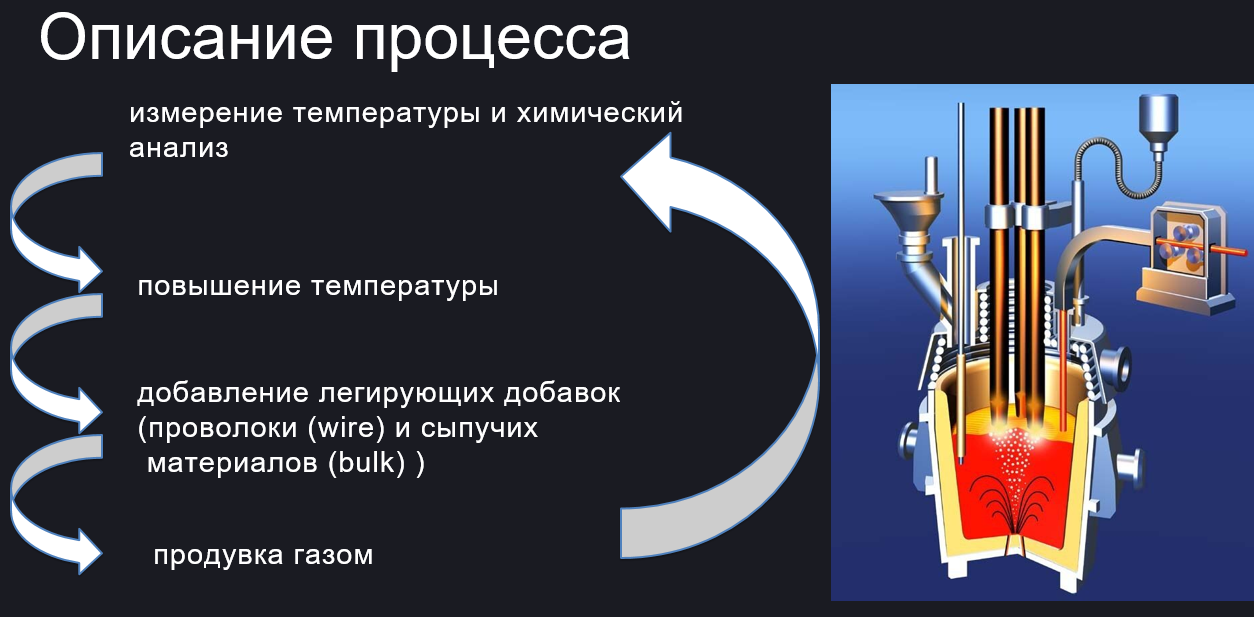

### Описание данных:
Данные состоят из нескольких файлов, полученных из разных источников:
* data_arc_new.csv — данные об электродах;
* data_bulk_new.csv — данные о подаче сыпучих материалов (объём);
* data_bulk_time_new.csv — данные о подаче сыпучих материалов (время);
* data_gas_new.csv — данные о продувке сплава газом;
* data_temp_new.csv — результаты измерения температуры;
* data_wire_new.csv — данные о проволочных материалах (объём);
* data_wire_time_new.csv — данные о проволочных материалах (время).

### В чем состоит задача?
* Объект моделирования — один ковш (один процесс варки)
* Определяется уникальным ключом
* Модель позволит снизить затраты на электричество, обслуживание и ремонты
* Целевая переменная target - последняя температура по всей партии
* Целевая метрика -  MAE (нужно получить не более 6.8 на тесте)

### Почему мой проект может быть интересен?
Мой проект представляет собой уникальное решение для металлургического комбината "Стальная птица", который стремится оптимизировать свои производственные расходы, уменьшив потребление электроэнергии на этапе обработки стали. В моем проекте были проведены подробные исследования и обработка сырых данных. Это позволило выделить значимые параметры, которые затем использовались для построения модели. Использование этой модели позволит контролировать температуру сплава и, следовательно, оптимизировать потребление электроэнергии. Также стоит отметить, что модель может быть полезна для других металлургических предприятий, которые стремятся уменьшить свои производственные расходы.

### Содержание проекта
* Вступление
** Описание проекта
** Описание этапа обработки
** Описание данных
** В чем состоит задача?
** Почему мой проект может быть интересен?
** Содержание проекта
* Предобработка и анализ данных
** Загрузка библиотек и данных
** Анализ сырых данных
** Предобработка и последующий анализ данных
** Объединение датафреймов в один
** Корреляция
** Вывод по предобработке и анализу данных
* Обучение модели 
** Разделение на тренировочную и тестовую выборки
** Выбор лучшей модели
** Тестирование лучшей модели и важность признаков
** Вывод по тестированию и важности признаков
* Вывод

## Предобработка и анализ данных

### Загрузка библиотек и данных

Подгружаем нужные нам библиотеки и задаем глобальные переменные

In [1]:
pip install shap

     |████████████████████████████████| 532 kB 2.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import shap

from sklearn.metrics import mean_absolute_error

import os
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
RND_ST = 271123

Расширяем рабочее пространство экрана и выравниваем его по краям

In [3]:
from IPython.core.display import display, HTML
display(HTML("""
<style>
.container { 
   width:90% !important; 
   position: relative; 
   right: 25px; 
}
</style>
"""))

Загружаем данные нам заказчиком датасеты, проверяя что путь верный

In [4]:
def pth_exist(pth):
    if os.path.exists(pth):
        df = pd.read_csv(pth)
        return df
    else:
        print('Путь не таков')
        return None

In [5]:
df_arc_new = pth_exist('/datasets/data_arc_new.csv')
df_bulk_new = pth_exist('/datasets/data_bulk_new.csv')
df_bulk_time_new = pth_exist('/datasets/data_bulk_time_new.csv')
df_gas_new = pth_exist('/datasets/data_gas_new.csv')
df_temp_new = pth_exist('/datasets/data_temp_new.csv')
df_wire_new = pth_exist('/datasets/data_wire_new.csv')
df_wire_time_new = pth_exist('/datasets/data_wire_time_new.csv')

Все данные были успешно загружены, как и библиотеки

### Анализ сырых данных

Делаем функцию для выдачи общей информации по каждому датасету

In [6]:
def info_func(df):
    print('Общая информация')
    print('')
    df.info()
    print('')
    print(df.describe())
    print('')
    print('Кол-во пропущенных значений')
    print('')
    print(df.isna().sum().sort_values(ascending=False))
    print('')
    print('Процент пропущенных значений')
    print('')
    print((df.isna().sum()/len(df)*100).sort_values(ascending=False))
    print('')
    print('Как выглядит датасет')
    print('')
    print(df.head(10))

Выведем общую информацию по всем датасетам

In [7]:
info_func(df_arc_new)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB

                key  Активная мощность  Реактивная мощность
count  14876.000000       14876.000000         14876.000000
mean    1615.220422           0.662752             0.438986
std      934.571502           0.258885             5.873485
min        1.000000           0.223120          -715.479924
25%      806.000000           0.467115             0.337175
50%     1617.000000           0.599587             0.441639
75%     2429.000000           0.

In [8]:
info_func(df_bulk_new)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB

               key      Bulk 1      Bulk 2       Bulk 3       Bulk 4  \
count  3129.000000  252.000000   22.000000  1298.000000  1014.000

In [9]:
info_func(df_bulk_time_new)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB

               key
count  3129.000000
mean   1624.383509
std     933.337642
min       1.000000
25%     816.000000
50%    1622.000000
75%    2431.000000
max

In [10]:
info_func(df_gas_new)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB

               key        Газ 1
count  3239.000000  3239.000000
mean   1621.861377    11.002062
std     935.386334     6.220327
min       1.000000     0.008399
25%     812.500000     7.043089
50%    1622.000000     9.836267
75%    2431.500000    13.769915
max    3241.000000    77.995040

Кол-во пропущенных значений

key      0
Газ 1    0
dtype: int64

Процент пропущенных значений

key      0.0
Газ 1    0.0
dtype: float64

Как выглядит датасет

   key      Газ 1
0    1  29.749986
1    2  12.555561
2    3  28.554793
3    4  18.841219
4    5   5.413692
5    6  11.273392
6    7   9.836267
7    8  15.171553
8    9   8.216623
9   10   6.529891


In [11]:
info_func(df_temp_new)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB

                key   Температура
count  18092.000000  14665.000000
mean    1616.460977   1590.722741
std      934.641385     20.394381
min        1.000000   1191.000000
25%      807.750000   1580.000000
50%     1618.000000   1590.000000
75%     2429.000000   1599.000000
max     3241.000000   1705.000000

Кол-во пропущенных значений

Температура     3427
key                0
Время замера       0
dtype: int64

Процент пропущенных значений

Температура     18.942074
key              0.000000
Время замера     0.000000
dtype: float64

Как выглядит датасет

   key         Время замера  Темпер

In [12]:
info_func(df_wire_new)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB

               key       Wire 1       Wire 2      Wire 3      Wire 4  Wire 5  \
count  3081.000000  3055.000000  1079.000000   63.000000   14.000000   1.000   
mean   1623.426485   100.895853    50.577323  189.482681   57.442841  15.132   
std     932.996726    42.012518    39.320216   99.513444   28.824667     NaN   
min       1.000000     1.918800     0.030160    0.144144  

In [13]:
info_func(df_wire_time_new)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB

               key
count  3081.000000
mean   1623.426485
std     932.996726
min       1.000000
25%     823.000000
50%    1619.000000
75%    2434.000000
max    3241.000000

Кол-во пропущенных значений

Wire 5    3080
Wire 7    3070
Wire 4    3067
Wire 8    3062
Wire 9    3052
Wire 3    3018
Wire 6    3008
Wire 2    2002
Wire 1      26
key          0
dtype: int64

Процент пропущенных значе

Как мы можем заметить датафреймы df_wire_time_new, df_wire_new, df_bulk_time_new, df_bulk_new имеют очень большой процент пропущенных значений.Также в датафреймах df_arc_new и df_temp_new не сходятся время начала и конца нагреваний. Вероятно в df_arc_new замеряют именно начало и конец нагрева. А в df_temp_new замеряют температуру до начала нагрева и после, как начальные и конечные температуры соответственно. Видны отрицательные значения в df_arc_new. Пока что трудно вычленить какую-то дополнительную информацию. Продолжим.

### Предобработка и последующий анализ данных

Надо поменять названия столбцов, привести даты к нужному формату, заполнить пропуски, обработать отрицательные значения и слишком низкие температуры.

Приведем столбцы к нормальным названиям, датафреймы с датами приводим к формату datetime

In [14]:
arc_columns = {
    'Начало нагрева дугой': 'heating_start',
    'Конец нагрева дугой': 'heating_finish',
    'Активная мощность': 'active_power',
    'Реактивная мощность': 'reactive_power',
}
df_arc_new = df_arc_new.rename(columns=arc_columns)
df_arc_new.head(10)

key        heating_start       heating_finish  active_power  reactive_power
0    1  2019-05-03 11:02:14  2019-05-03 11:06:02      0.305130        0.211253
1    1  2019-05-03 11:07:28  2019-05-03 11:10:33      0.765658        0.477438
2    1  2019-05-03 11:11:44  2019-05-03 11:14:36      0.580313        0.430460
3    1  2019-05-03 11:18:14  2019-05-03 11:24:19      0.518496        0.379979
4    1  2019-05-03 11:26:09  2019-05-03 11:28:37      0.867133        0.643691
5    2  2019-05-03 11:34:14  2019-05-03 11:36:31      0.381124        0.220351
6    2  2019-05-03 11:38:50  2019-05-03 11:44:28      0.261665        0.205527
7    2  2019-05-03 11:46:19  2019-05-03 11:48:25      0.710297        0.484962
8    2  2019-05-03 11:49:48  2019-05-03 11:53:18      0.786322        0.542517
9    3  2019-05-03 12:06:54  2019-05-03 12:11:34      1.101678        0.820856

In [15]:
bulk_columns = {
    'Bulk 1': 'bulk_1',
    'Bulk 2': 'bulk_2',
    'Bulk 3': 'bulk_3',
    'Bulk 4': 'bulk_4',
    'Bulk 5': 'bulk_5',
    'Bulk 6': 'bulk_6',
    'Bulk 7': 'bulk_7',
    'Bulk 8': 'bulk_8',
    'Bulk 9': 'bulk_9',
    'Bulk 10': 'bulk_10',
    'Bulk 11': 'bulk_11',
    'Bulk 12': 'bulk_12',
    'Bulk 13': 'bulk_13',
    'Bulk 14': 'bulk_14',
    'Bulk 15': 'bulk_15',
}
df_bulk_new = df_bulk_new.rename(columns=bulk_columns)
df_bulk_time_new = df_bulk_time_new.rename(columns=bulk_columns)
print(df_bulk_new.head(10))
df_bulk_time_new.head(10)

   key  bulk_1  bulk_2  bulk_3  bulk_4  bulk_5  bulk_6  bulk_7  bulk_8  \
0    1     NaN     NaN     NaN    43.0     NaN     NaN     NaN     NaN   
1    2     NaN     NaN     NaN    73.0     NaN     NaN     NaN     NaN   
2    3     NaN     NaN     NaN    34.0     NaN     NaN     NaN     NaN   
3    4     NaN     NaN     NaN    81.0     NaN     NaN     NaN     NaN   
4    5     NaN     NaN     NaN    78.0     NaN     NaN     NaN     NaN   
5    6     NaN     NaN     NaN   117.0     NaN     NaN     NaN     NaN   
6    7     NaN     NaN     NaN   117.0     NaN     NaN     NaN     NaN   
7    8     NaN     NaN     NaN    99.0     NaN     NaN     NaN     NaN   
8    9     NaN     NaN     NaN   117.0     NaN     NaN     NaN     NaN   
9   10     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   bulk_9  bulk_10  bulk_11  bulk_12  bulk_13  bulk_14  bulk_15  
0     NaN      NaN      NaN    206.0      NaN    150.0    154.0  
1     NaN      NaN      NaN    206.0      NaN    149.

key bulk_1 bulk_2 bulk_3               bulk_4 bulk_5 bulk_6 bulk_7 bulk_8  \
0    1    NaN    NaN    NaN  2019-05-03 11:28:48    NaN    NaN    NaN    NaN   
1    2    NaN    NaN    NaN  2019-05-03 11:36:50    NaN    NaN    NaN    NaN   
2    3    NaN    NaN    NaN  2019-05-03 12:32:39    NaN    NaN    NaN    NaN   
3    4    NaN    NaN    NaN  2019-05-03 12:43:22    NaN    NaN    NaN    NaN   
4    5    NaN    NaN    NaN  2019-05-03 13:30:47    NaN    NaN    NaN    NaN   
5    6    NaN    NaN    NaN  2019-05-03 13:57:27    NaN    NaN    NaN    NaN   
6    7    NaN    NaN    NaN  2019-05-03 14:18:58    NaN    NaN    NaN    NaN   
7    8    NaN    NaN    NaN  2019-05-03 15:17:58    NaN    NaN    NaN    NaN   
8    9    NaN    NaN    NaN  2019-05-03 16:03:08    NaN    NaN    NaN    NaN   
9   10    NaN    NaN    NaN                  NaN    NaN    NaN    NaN    NaN   

  bulk_9 bulk_10 bulk_11              bulk_12 bulk_13              bulk_14  \
0    NaN     NaN     NaN  2019-05-03 11:24:31     NaN  2019-05-03 11:14:50   
1    NaN     NaN     NaN  2019-05-03 11:53:30     NaN  2019-05-03 11:48:37   
2    NaN     NaN     NaN  2019-05-03 12:27:13     NaN  2019-05-03 12:21:01   
3    NaN     NaN     NaN  2019-05-03 12:58:00     NaN  2019-05-03 12:51:11   
4    NaN     NaN     NaN  2019-05-03 13:30:47     NaN  2019-05-03 13:34:12   
5    NaN     NaN     NaN  2019-05-03 13:48:52     NaN  2019-05-03 14:09:42   
6    NaN     NaN     NaN  2019-05-03 14:41:26     NaN  2019-05-03 14:30:50   
7    NaN     NaN     NaN  2019-05-03 15:17:58     NaN  2019-05-03 15:13:18   
8    NaN     NaN     NaN  2019-05-03 16:03:08     NaN  2019-05-03 16:00:16   
9    NaN     NaN     NaN  2019-05-03 16:38:11     NaN  2019-05-03 16:34:24   

               bulk_15  
0  2019-05-03 11:10:43  
1  2019-05-03 11:44:39  
2  2019-05-03 12:16:16  
3  2019-05-03 12:46:36  
4  2019-05-03 13:30:47  
5  2019-05-03 14:03:15  
6  2019-05-03 14:27:16  
7  2019-05-03 15:05:33  
8  2019-05-03 15:52:39  
9  2019-05-03 16:29:56

In [16]:
gas_columns = {
    'Газ 1': 'gas',
}
df_gas_new = df_gas_new.rename(columns=gas_columns)
df_gas_new.head(10)

key        gas
0    1  29.749986
1    2  12.555561
2    3  28.554793
3    4  18.841219
4    5   5.413692
5    6  11.273392
6    7   9.836267
7    8  15.171553
8    9   8.216623
9   10   6.529891

In [17]:
temp_columns = {
    'Время замера': 'time',
    'Температура': 'temperature'
}

df_temp_new = df_temp_new.rename(columns=temp_columns)
df_temp_new.head(10)

key                 time  temperature
0    1  2019-05-03 11:02:04       1571.0
1    1  2019-05-03 11:07:18       1604.0
2    1  2019-05-03 11:11:34       1618.0
3    1  2019-05-03 11:18:04       1601.0
4    1  2019-05-03 11:25:59       1606.0
5    1  2019-05-03 11:30:38       1613.0
6    2  2019-05-03 11:34:04       1581.0
7    2  2019-05-03 11:38:40       1577.0
8    2  2019-05-03 11:46:09       1589.0
9    2  2019-05-03 11:49:38       1604.0

In [18]:
wire_columns = {
    'Wire 1': 'wire_1',
    'Wire 2': 'wire_2',
    'Wire 3': 'wire_3',
    'Wire 4': 'wire_4',
    'Wire 5': 'wire_5',
    'Wire 6': 'wire_6',
    'Wire 7': 'wire_7',
    'Wire 8': 'wire_8',
    'Wire 9': 'wire_9',
}
df_wire_new = df_wire_new.rename(columns=wire_columns)
df_wire_time_new = df_wire_time_new.rename(columns=wire_columns)
print(df_wire_new.head(10))
df_wire_time_new.head(10)

   key      wire_1     wire_2  wire_3  wire_4  wire_5  wire_6  wire_7  wire_8  \
0    1   60.059998        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    2   96.052315        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    3   91.160157        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3    4   89.063515        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4    5   89.238236   9.114560     NaN     NaN     NaN     NaN     NaN     NaN   
5    6   99.109917   9.114560     NaN     NaN     NaN     NaN     NaN     NaN   
6    7   98.061600        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
7    8  155.282394        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
8    9  113.393279   9.143681     NaN     NaN     NaN     NaN     NaN     NaN   
9   10   81.244796  12.376000     NaN     NaN     NaN     NaN     NaN     NaN   

   wire_9  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
5     NaN  
6     NaN  
7     NaN  


key               wire_1               wire_2 wire_3 wire_4 wire_5 wire_6  \
0    1  2019-05-03 11:06:19                  NaN    NaN    NaN    NaN    NaN   
1    2  2019-05-03 11:36:50                  NaN    NaN    NaN    NaN    NaN   
2    3  2019-05-03 12:11:46                  NaN    NaN    NaN    NaN    NaN   
3    4  2019-05-03 12:43:22                  NaN    NaN    NaN    NaN    NaN   
4    5  2019-05-03 13:20:44  2019-05-03 13:15:34    NaN    NaN    NaN    NaN   
5    6  2019-05-03 13:57:27  2019-05-03 13:48:52    NaN    NaN    NaN    NaN   
6    7  2019-05-03 14:18:58                  NaN    NaN    NaN    NaN    NaN   
7    8  2019-05-03 15:01:30                  NaN    NaN    NaN    NaN    NaN   
8    9  2019-05-03 15:45:44  2019-05-03 15:39:37    NaN    NaN    NaN    NaN   
9   10  2019-05-03 16:27:00  2019-05-03 16:22:36    NaN    NaN    NaN    NaN   

  wire_7 wire_8 wire_9  
0    NaN    NaN    NaN  
1    NaN    NaN    NaN  
2    NaN    NaN    NaN  
3    NaN    NaN    NaN  
4    NaN    NaN    NaN  
5    NaN    NaN    NaN  
6    NaN    NaN    NaN  
7    NaN    NaN    NaN  
8    NaN    NaN    NaN  
9    NaN    NaN    NaN

In [19]:
columns_bulk = ['bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6', 'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12','bulk_13', 'bulk_14', 'bulk_15']
for column in columns_bulk:
    df_bulk_time_new[column] = pd.to_datetime(df_bulk_time_new[column], format='%Y-%m-%d %H:%M')
df_bulk_time_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   bulk_1   252 non-null    datetime64[ns]
 2   bulk_2   22 non-null     datetime64[ns]
 3   bulk_3   1298 non-null   datetime64[ns]
 4   bulk_4   1014 non-null   datetime64[ns]
 5   bulk_5   77 non-null     datetime64[ns]
 6   bulk_6   576 non-null    datetime64[ns]
 7   bulk_7   25 non-null     datetime64[ns]
 8   bulk_8   1 non-null      datetime64[ns]
 9   bulk_9   19 non-null     datetime64[ns]
 10  bulk_10  176 non-null    datetime64[ns]
 11  bulk_11  177 non-null    datetime64[ns]
 12  bulk_12  2450 non-null   datetime64[ns]
 13  bulk_13  18 non-null     datetime64[ns]
 14  bulk_14  2806 non-null   datetime64[ns]
 15  bulk_15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


In [20]:
columns_wire = ['wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6','wire_7', 'wire_8', 'wire_9']
for column in columns_wire:
    df_wire_time_new[column] = pd.to_datetime(df_wire_time_new[column], format='%Y-%m-%d %H:%M')
df_wire_time_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   wire_1  3055 non-null   datetime64[ns]
 2   wire_2  1079 non-null   datetime64[ns]
 3   wire_3  63 non-null     datetime64[ns]
 4   wire_4  14 non-null     datetime64[ns]
 5   wire_5  1 non-null      datetime64[ns]
 6   wire_6  73 non-null     datetime64[ns]
 7   wire_7  11 non-null     datetime64[ns]
 8   wire_8  19 non-null     datetime64[ns]
 9   wire_9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


В датафрейме df_arc_new заказчик попросил убрать значения реактивной мощности ниже 0. А в df_temp_new он попросил убрать значения температур, которые ниже 1500, а также ключи в которых всего 1 замер температур. Напомню, что ключ - это один процесс варки. 

Убираем реактивную мощность меньше 0.

In [21]:
df_arc_new['heating_start'] = pd.to_datetime(df_arc_new['heating_start'], format='%Y-%m-%d %H:%M')
df_arc_new['heating_finish'] = pd.to_datetime(df_arc_new['heating_finish'], format='%Y-%m-%d %H:%M')
negative_keys = df_arc_new[df_arc_new['reactive_power'] < 0]['key'].unique()
df_arc_new = df_arc_new[~df_arc_new['key'].isin(negative_keys)]
df_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14872 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             14872 non-null  int64         
 1   heating_start   14872 non-null  datetime64[ns]
 2   heating_finish  14872 non-null  datetime64[ns]
 3   active_power    14872 non-null  float64       
 4   reactive_power  14872 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 697.1 KB


Убираем слишком низкие температуры.

In [22]:
df_temp_new['time'] = pd.to_datetime(df_temp_new['time'])
low_temp = df_temp_new[df_temp_new['temperature'] < 1500]['key'].unique()
df_temp_new = df_temp_new[~df_temp_new['key'].isin(low_temp)]
df_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18065 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   key          18065 non-null  int64         
 1   time         18065 non-null  datetime64[ns]
 2   temperature  14643 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 564.5 KB


Также заказчик попросил заполнить отсутствующие значения нулём и удалить признаки в которых больше 80% пропусков. Поэтому удаляем, а оставшиеся заполняем нулем.


In [23]:
df_wire_new.drop(['wire_3', 'wire_4', 'wire_5', 'wire_6','wire_7', 'wire_8', 'wire_9'], axis=1, inplace=True)
df_wire_new = df_wire_new.fillna(0)
info_func(df_wire_new)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   wire_1  3081 non-null   float64
 2   wire_2  3081 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 72.3 KB

               key       wire_1       wire_2
count  3081.000000  3081.000000  3081.000000
mean   1623.426485   100.044411    17.712733
std     932.996726    42.841120    33.517734
min       1.000000     0.000000     0.000000
25%     823.000000    70.281120     0.000000
50%    1619.000000   100.114563     0.000000
75%    2434.000000   125.798405    23.162880
max    3241.000000   330.314424   282.780152

Кол-во пропущенных значений

key       0
wire_1    0
wire_2    0
dtype: int64

Процент пропущенных значений

key       0.0
wire_1    0.0
wire_2    0.0
dtype: float64

Как выглядит датасет

   key      wire_1     wire_2
0    1   60.05

In [24]:
df_bulk_new.drop(['bulk_1', 'bulk_2', 'bulk_5', 'bulk_6', 'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_13'], axis=1, inplace=True)
df_bulk_new = df_bulk_new.fillna(0)
df_bulk_new = df_bulk_new.astype('int')
info_func(df_bulk_new)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   key      3129 non-null   int64
 1   bulk_3   3129 non-null   int64
 2   bulk_4   3129 non-null   int64
 3   bulk_12  3129 non-null   int64
 4   bulk_14  3129 non-null   int64
 5   bulk_15  3129 non-null   int64
dtypes: int64(6)
memory usage: 146.8 KB

               key       bulk_3       bulk_4      bulk_12      bulk_14  \
count  3129.000000  3129.000000  3129.000000  3129.000000  3129.000000   
mean   1624.383509    47.240332    33.830617   203.948226   152.706616   
std     933.337642    74.239954    56.034505   151.419639    81.091421   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     816.000000     0.000000     0.000000   105.000000   104.000000   
50%    1622.000000     0.000000     0.000000   206.000000   148.000000   
75%    2431.000000    80.0000

Заказчик попросил агрегировать данные в датафрейме df_arc_new (просуммировать все значения по одному ключу). Я решил добавить новый столбец полной мощности, который считается по нижеприведенной формуле: 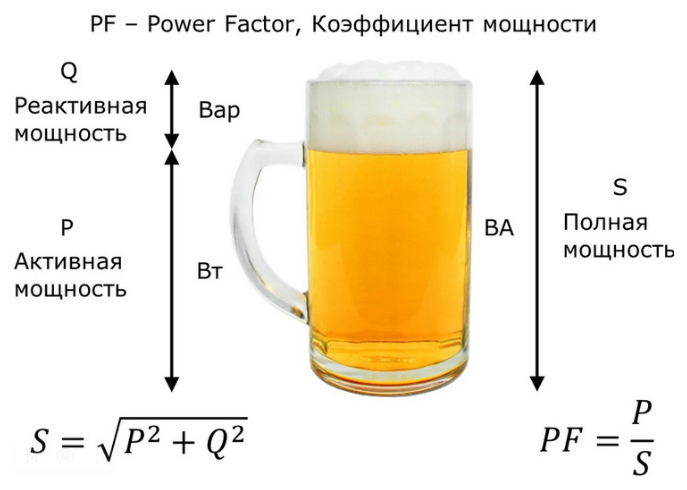

Это новый дополнительный признак (добавляю я его сейчас, чтобы посмотреть на нормальность распределения), и вероятно мы удалим первичные два столбца, т.к. там будет высокая корреляция (наверное что-то около единицы).

In [25]:
df_arc_new['full_power'] = (df_arc_new['reactive_power']**2 + df_arc_new['active_power']**2)**0.5
df_arc_new.head(10)

key       heating_start      heating_finish  active_power  reactive_power  \
0    1 2019-05-03 11:02:14 2019-05-03 11:06:02      0.305130        0.211253   
1    1 2019-05-03 11:07:28 2019-05-03 11:10:33      0.765658        0.477438   
2    1 2019-05-03 11:11:44 2019-05-03 11:14:36      0.580313        0.430460   
3    1 2019-05-03 11:18:14 2019-05-03 11:24:19      0.518496        0.379979   
4    1 2019-05-03 11:26:09 2019-05-03 11:28:37      0.867133        0.643691   
5    2 2019-05-03 11:34:14 2019-05-03 11:36:31      0.381124        0.220351   
6    2 2019-05-03 11:38:50 2019-05-03 11:44:28      0.261665        0.205527   
7    2 2019-05-03 11:46:19 2019-05-03 11:48:25      0.710297        0.484962   
8    2 2019-05-03 11:49:48 2019-05-03 11:53:18      0.786322        0.542517   
9    3 2019-05-03 12:06:54 2019-05-03 12:11:34      1.101678        0.820856   

   full_power  
0    0.371123  
1    0.902319  
2    0.722536  
3    0.642824  
4    1.079934  
5    0.440239  
6    0.332731  
7    0.860064  
8    0.955315  
9    1.373863

Помимо полной мощности я хочу добавить еще один признак. Так как мы агрегируем данные, то мы потеряем кол-во этапов нагрева. Чтобы этого не произошло добавим новый признак (который мы добавим позже к агрегированной df_arc_new)

In [26]:
heat_steps = df_arc_new['key'].value_counts().reset_index(name='heat_steps').rename(columns={'index': 'key'})
heat_steps.head(20)

key  heat_steps
0   2108          16
1   1689          15
2   1513          15
3   2567          14
4     46          13
5    322          13
6   1829          12
7   2916          12
8     44          12
9   1958          11
10   638          11
11  2926          11
12  2917          11
13  1880          11
14  1014          10
15  2046          10
16  1866          10
17  1470          10
18  2631          10
19    45          10

Так же я хочу добавить столбец с временем нагрева (в секундах), удалив при этом изначальные столбцы с временем (который мы добавим позже к агрегированной df_arc_new)

In [27]:
df_arc_new['seconds_arc'] = (df_arc_new['heating_finish'] - 
                                   df_arc_new['heating_start']).dt.seconds
df_arc_new.head(10)

key       heating_start      heating_finish  active_power  reactive_power  \
0    1 2019-05-03 11:02:14 2019-05-03 11:06:02      0.305130        0.211253   
1    1 2019-05-03 11:07:28 2019-05-03 11:10:33      0.765658        0.477438   
2    1 2019-05-03 11:11:44 2019-05-03 11:14:36      0.580313        0.430460   
3    1 2019-05-03 11:18:14 2019-05-03 11:24:19      0.518496        0.379979   
4    1 2019-05-03 11:26:09 2019-05-03 11:28:37      0.867133        0.643691   
5    2 2019-05-03 11:34:14 2019-05-03 11:36:31      0.381124        0.220351   
6    2 2019-05-03 11:38:50 2019-05-03 11:44:28      0.261665        0.205527   
7    2 2019-05-03 11:46:19 2019-05-03 11:48:25      0.710297        0.484962   
8    2 2019-05-03 11:49:48 2019-05-03 11:53:18      0.786322        0.542517   
9    3 2019-05-03 12:06:54 2019-05-03 12:11:34      1.101678        0.820856   

   full_power  seconds_arc  
0    0.371123          228  
1    0.902319          185  
2    0.722536          172  
3    0.642824          365  
4    1.079934          148  
5    0.440239          137  
6    0.332731          338  
7    0.860064          126  
8    0.955315          210  
9    1.373863          280

Построим график всех трех мощностей до агрегации

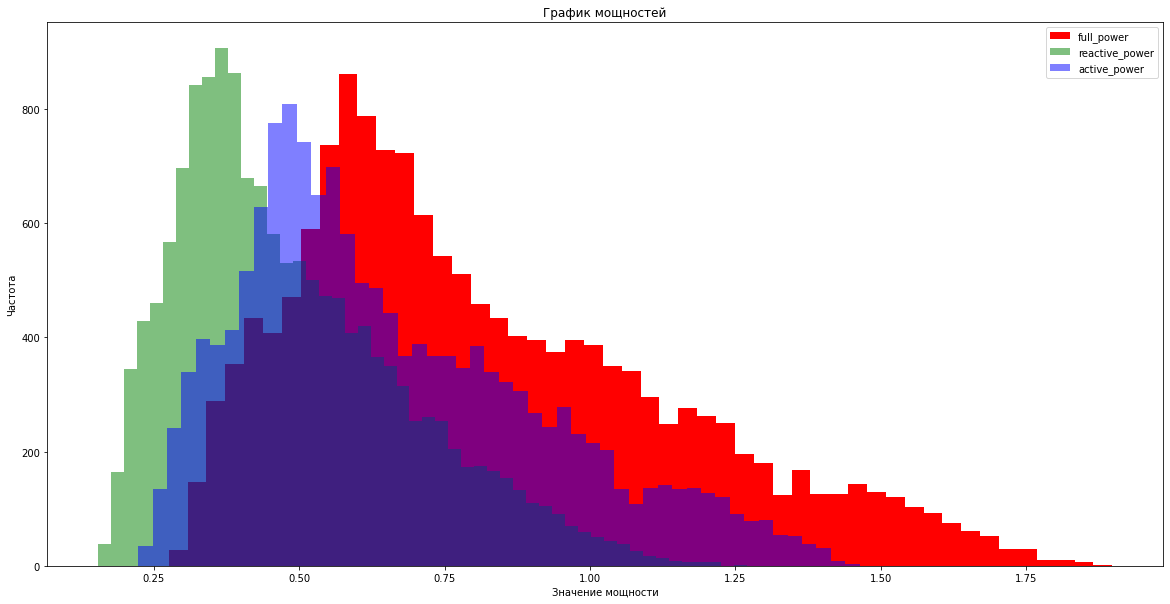

In [28]:
plt.figure(figsize=(20, 10))
df_arc_new['full_power'].plot(kind='hist', bins=50, legend=True, color='red')
df_arc_new['reactive_power'].plot(kind='hist', bins=50, legend=True, color='green', alpha=0.5)
df_arc_new['active_power'].plot(kind='hist', bins=50, legend=True, color='blue', alpha=0.5)
plt.title('График мощностей')
plt.ylabel('Частота')
plt.xlabel('Значение мощности')
plt.show()

Мощности распределены нормально со смещением купола в левую сторону и большим хвостом справа

Агрегируем столбцы и добавим новый признаки

In [29]:
df_arc_new = df_arc_new.groupby(by = 'key').sum()
df_arc_new = df_arc_new.merge(heat_steps, on='key')
df_arc_new.head(10)

key  active_power  reactive_power  full_power  seconds_arc  heat_steps
0    1      3.036730        2.142821    3.718736         1098           5
1    2      2.139408        1.453357    2.588349          811           4
2    3      4.063641        2.937457    5.019223          655           5
3    4      2.706489        2.056992    3.400038          741           4
4    5      2.252950        1.687991    2.816980          869           4
5    6      2.725274        1.881313    3.313074          952           4
6    7      2.626877        1.960419    3.283913          673           4
7    8      2.678958        2.096952    3.405956          913           4
8    9      3.520820        2.527365    4.335261          625           5
9   10      3.118778        2.154941    3.791005          825           6

Построим график всех трех мощностей после агрегации

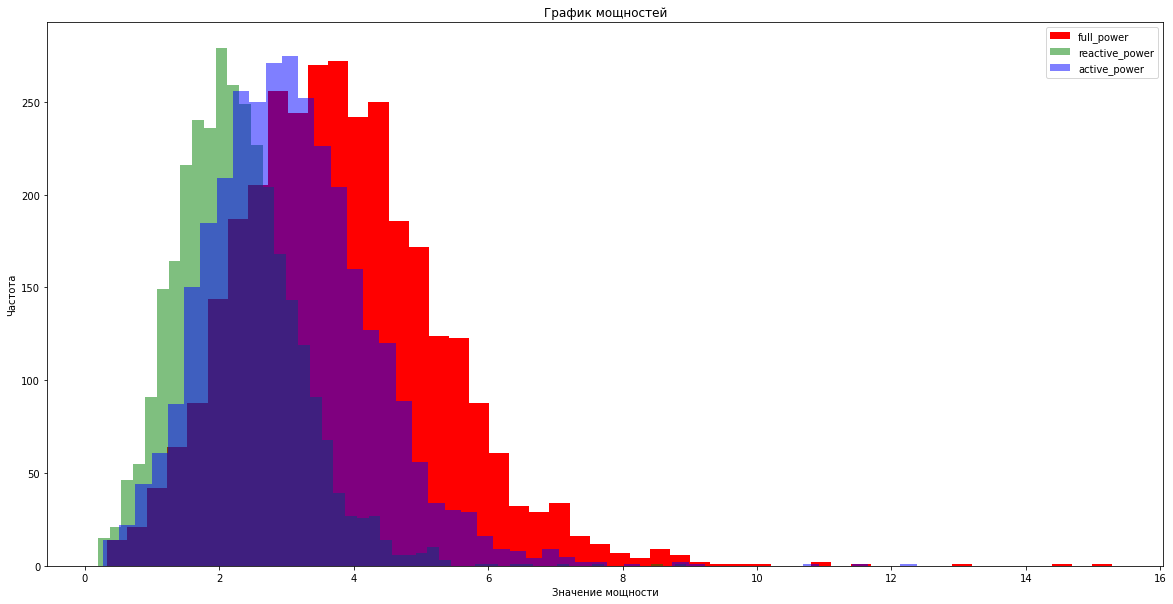

In [30]:
plt.figure(figsize=(20, 10))
df_arc_new['full_power'].plot(kind='hist', bins=50, legend=True, color='red')
df_arc_new['reactive_power'].plot(kind='hist', bins=50, legend=True, color='green', alpha=0.5)
df_arc_new['active_power'].plot(kind='hist', bins=50, legend=True, color='blue', alpha=0.5)
plt.title('График мощностей')
plt.ylabel('Частота')
plt.xlabel('Значение мощности')
plt.show()

Удаляем хвосты справа. Чтобы убедиться, что все получилось достаточно повторно вызвать ячейку с графиком.

In [31]:
#df_arc_new = df_arc_new[df_arc_new['full_power'] <= 10]
#df_arc_new = df_arc_new[df_arc_new['reactive_power'] <= 10]
#df_arc_new = df_arc_new[df_arc_new['active_power'] <= 10]

Так же как и на предыдущем графике мощности распределены нормально со смещением купола в левую сторону, но тут намного меньше хвост справа. Давайте еще посмотрим на распределение этапов нагрева и кол-во минут, которые потребовались на нагревание(новые признаки), объем подаваемого газа, и температуру. Остальные датасеты либо с временем, либо имеет большое кол-во пропусков - они не очень информативны.

Построим график кол-ва этапов нагрева

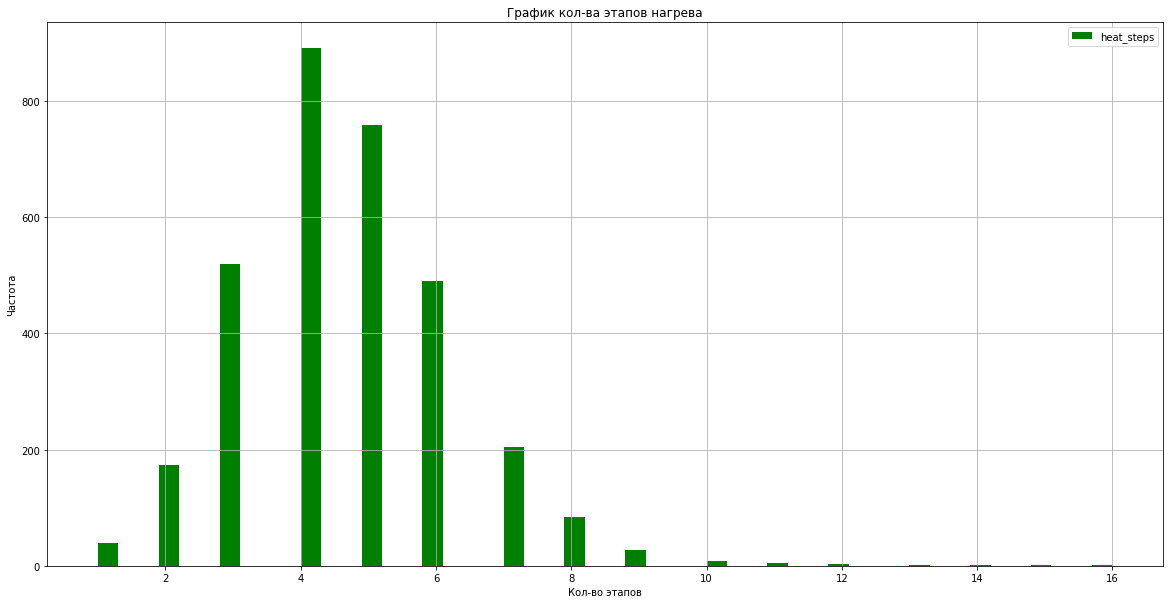

In [32]:
df_arc_new['heat_steps'].hist(bins=50, figsize=(20,10), legend = True, color='green')
plt.title('График кол-ва этапов нагрева')
plt.ylabel('Частота')
plt.xlabel('Кол-во этапов')
plt.show()

Удаляем хвосты справа. Чтобы убедиться, что все получилось достаточно повторно вызвать ячейку с графиком.

In [33]:
#df_arc_new = df_arc_new[df_arc_new['heat_steps'] <= 10]
#df_arc_new = df_arc_new[df_arc_new['heat_steps'] > 0]

Построим график времени нагрева

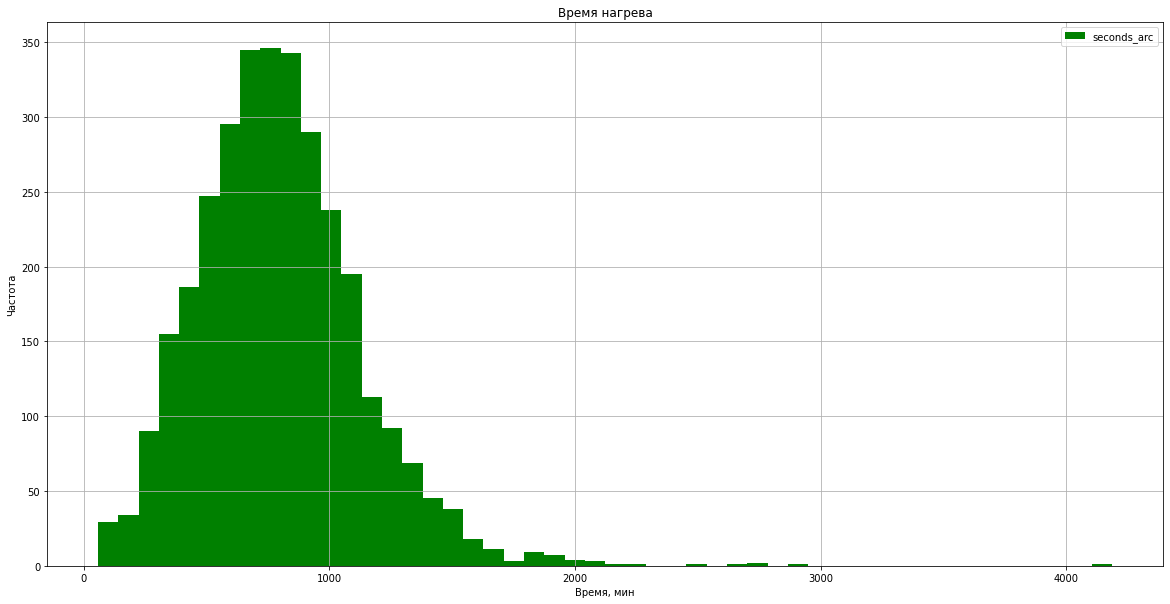

In [34]:
df_arc_new['seconds_arc'].hist(bins=50, figsize=(20,10), legend = True, color='green')
plt.title('Время нагрева')
plt.ylabel('Частота')
plt.xlabel('Время, мин')
plt.show()

Удаляем хвосты справа. Чтобы убедиться, что все получилось достаточно повторно вызвать ячейку с графиком.

In [35]:
#df_arc_new = df_arc_new[df_arc_new['minute_arc'] <= 100]
#df_arc_new = df_arc_new[df_arc_new['minute_arc'] > 0]

Построим график объема газа

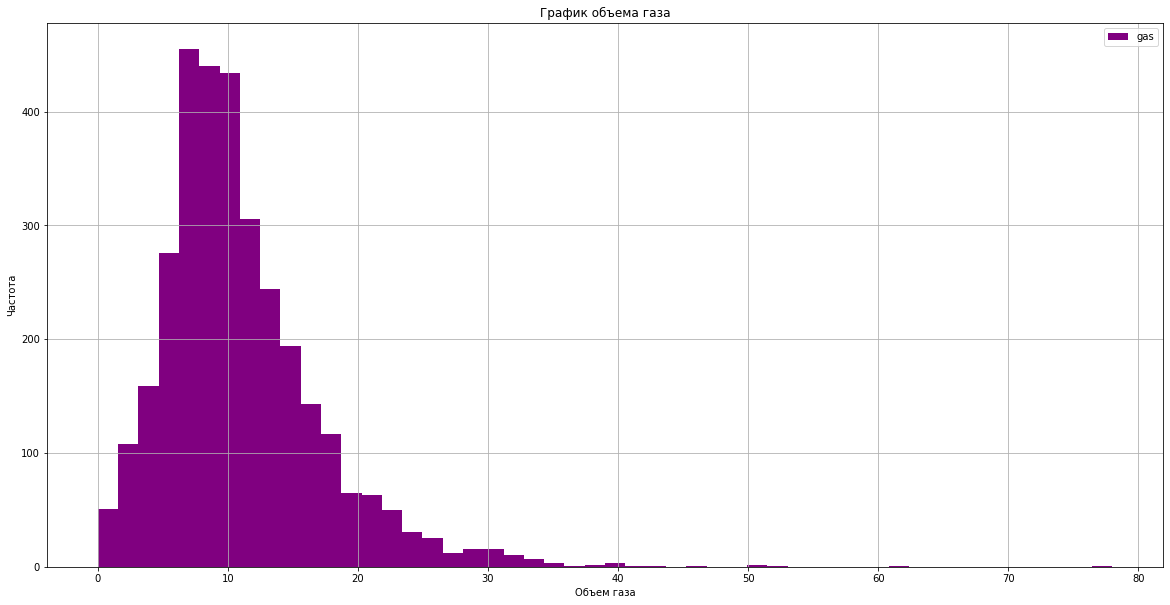

In [36]:
df_gas_new['gas'].hist(bins=50, figsize=(20,10), legend = True, color='purple')
plt.title('График объема газа')
plt.ylabel('Частота')
plt.xlabel('Объем газа')
plt.show()

Удаляем хвосты справа. Чтобы убедиться, что все получилось достаточно повторно вызвать ячейку с графиком.

In [37]:
#df_gas_new = df_gas_new[df_gas_new['gas'] <= 40]

Как мы можем видеть купол кол-ва этапов нагрева, времени и газа очень похожи на купола мощностей. С таким же смещением купола влево и хвостом справа. Но пока что сложно сказать какая между ними корреляция.

Построим график температур до агрегации

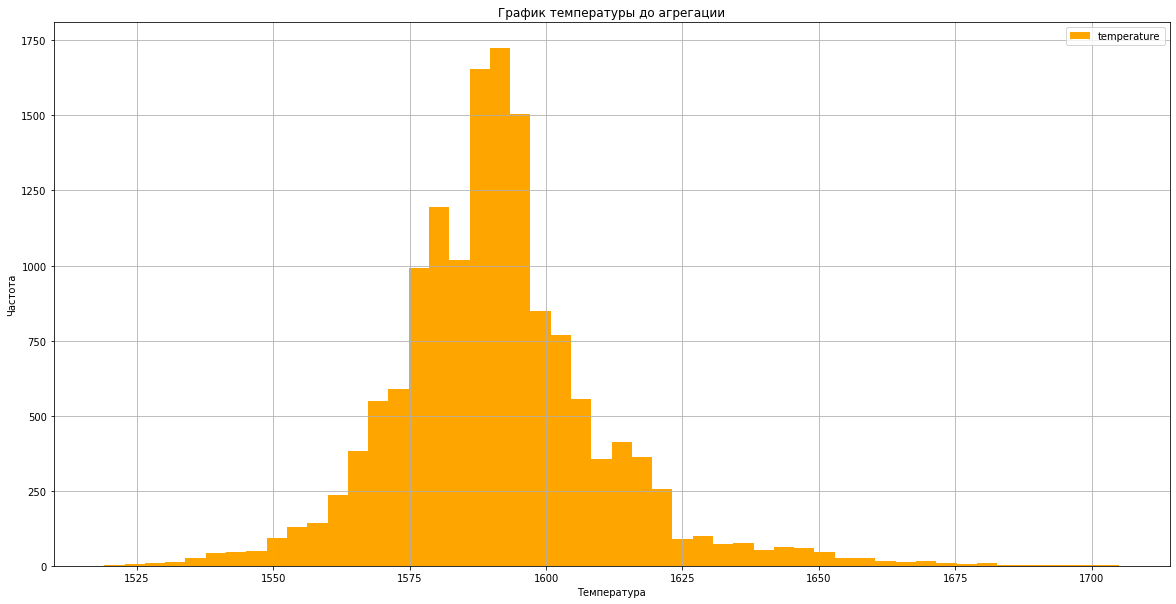

In [38]:
df_temp_new['temperature'].hist(bins=50, figsize=(20,10), legend = True, color='orange')
plt.title('График температуры до агрегации')
plt.ylabel('Частота')
plt.xlabel('Температура')
plt.show()

Удаляем хвосты справа. Чтобы убедиться, что все получилось достаточно повторно вызвать ячейку с графиком.

In [39]:
#df_temp_new = df_temp_new[df_temp_new['temperature'] <= 1675]
#df_temp_new = df_temp_new[df_temp_new['temperature'] >= 1525]

В отличие от предыдущих графиков - график температуры не имеет смещения купола и больших хвостов справа или слева. Температуру тоже следует агрегировать. Выделим первую и последнюю температуру. Также создадим новый признак (похожий на признак в df_arc_new), который будет содержать время, которое прошло между первым и последним замером (его мы добавим чуть позже в уже агрегированную таблицу).

Удалим ключи, где всего один замер температуры.

In [40]:
df_temp_new = df_temp_new.groupby('key').filter(lambda x: x['temperature'].count() > 1)

Вычисляем разницу во времени между первым и последним замером в минутах (тут наверное можно сделать полаконичнее, но у меня не особо получалось, поэтому такой костыль).

In [41]:
df_temp_new_2 = df_temp_new
df_temp_new_2['seconds_temp'] = df_temp_new_2.groupby('key')['time'].transform(lambda x: (x.max() - x.min()).total_seconds())
df_temp_new_2 = df_temp_new_2.drop('time', axis=1)
df_temp_new_2 = df_temp_new_2.drop('temperature', axis=1)
df_temp_new_2 = df_temp_new_2.groupby('key').mean()
df_temp_new_2.head(10)

seconds_temp
key              
1          1714.0
2          1265.0
3          1753.0
4          1220.0
5          1536.0
6          1497.0
7          1744.0
8          1615.0
9          1811.0
10         1551.0

Агрегируем данные

In [42]:
df_temp_upd = df_temp_new.groupby('key').agg(first_temperature=('temperature', 'first'), last_temperature=('temperature', 'last'))
df_temp_upd = df_temp_upd.merge(df_temp_new_2, on='key')
print(df_temp_upd.head(10))
df_temp_upd.tail(10)

     first_temperature  last_temperature  seconds_temp
key                                                   
1               1571.0            1613.0        1714.0
2               1581.0            1602.0        1265.0
3               1596.0            1599.0        1753.0
4               1601.0            1625.0        1220.0
5               1576.0            1602.0        1536.0
6               1543.0            1596.0        1497.0
7               1586.0            1599.0        1744.0
8               1577.0            1598.0        1615.0
9               1587.0            1592.0        1811.0
10              1574.0            1593.0        1551.0


first_temperature  last_temperature  seconds_temp
key                                                    
2489             1613.0            1579.0         802.0
2490             1602.0            1619.0        2334.0
2492             1618.0            1595.0        2438.0
2493             1599.0            1594.0        1863.0
2494             1585.0            1591.0         905.0
2495             1570.0            1591.0        1380.0
2496             1554.0            1591.0        1705.0
2497             1571.0            1589.0         962.0
2498             1591.0            1594.0        1520.0
2499             1569.0            1603.0        1537.0

Как мы можем видеть пропали все значения key больше 2499. Получается что там были пропущенные значения и таким образом мы выполнили требование заказчика, что в итоговом датафрейме не должно отстаться key больше 2500 включительно.

Посмотрим на график температур после агрегации

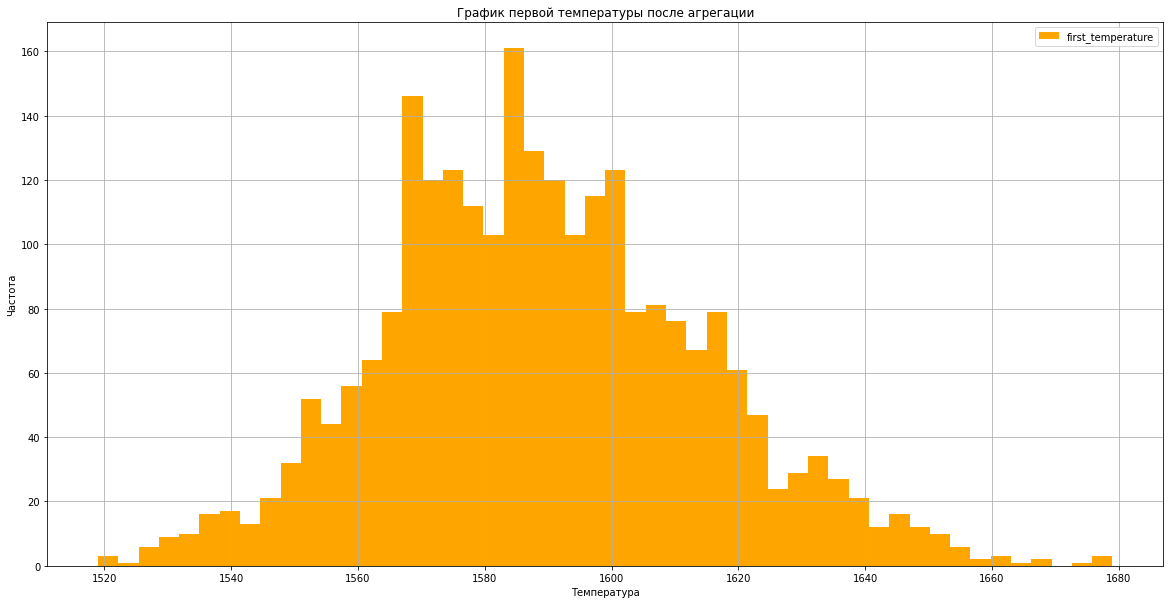

In [43]:
df_temp_upd['first_temperature'].hist(bins=50, figsize=(20,10), legend = True, color='orange')
plt.title('График первой температуры после агрегации')
plt.ylabel('Частота')
plt.xlabel('Температура')
plt.show()

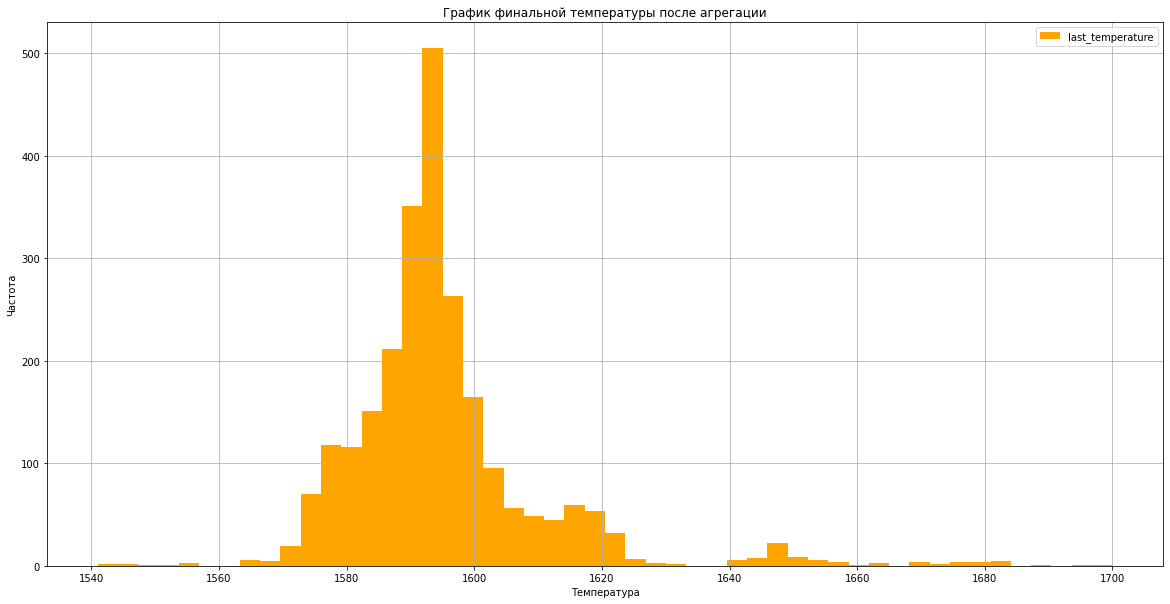

In [44]:
df_temp_upd['last_temperature'].hist(bins=50, figsize=(20,10), legend = True, color='orange')
plt.title('График финальной температуры после агрегации')
plt.ylabel('Частота')
plt.xlabel('Температура')
plt.show()

Как и ранее график температуры не имеет смещения купола и больших хвостов справа или слева. Можем заметить, что перед нагревом температура имеет нормальное распределение, в то время как в конце нагрева температура стремится к какой-то одной определенной температуре.

Помимо датафреймов с огромным процентом пропущенных значений - данные выглядят хорошо. Мы добавили несколько дополнительных признаков для последующего обучения модели. Смотря на графики выше можно только предпологать как хвосты справа повлияют на обучение модели. Пока что не будем их удалять и посмотрим что из этого выйдет.

### Объединение датафреймов в один

Заказчик сказал, что в итоговую таблицу не идут таблицы о времени подачи, соответственно мы их не добавляем. Также заказчик сказал, что не должно быть ключей с номерами больше, чем 2500. Также нужно удалить признак key. Получается всего 5 датафреймов.

In [45]:
merged_df = pd.merge(df_arc_new, df_temp_upd, on='key', how='inner')
merged_df = pd.merge(merged_df, df_gas_new, on='key', how='inner')
merged_df = pd.merge(merged_df, df_bulk_new, on='key', how='inner')
merged_df = pd.merge(merged_df, df_wire_new, on='key', how='inner')
info_func(merged_df)
merged_df.tail(10)

Общая информация

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2323
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                2324 non-null   int64  
 1   active_power       2324 non-null   float64
 2   reactive_power     2324 non-null   float64
 3   full_power         2324 non-null   float64
 4   seconds_arc        2324 non-null   int64  
 5   heat_steps         2324 non-null   int64  
 6   first_temperature  2324 non-null   float64
 7   last_temperature   2324 non-null   float64
 8   seconds_temp       2324 non-null   float64
 9   gas                2324 non-null   float64
 10  bulk_3             2324 non-null   int64  
 11  bulk_4             2324 non-null   int64  
 12  bulk_12            2324 non-null   int64  
 13  bulk_14            2324 non-null   int64  
 14  bulk_15            2324 non-null   int64  
 15  wire_1             2324 non-null   float64
 16  wire_2

key  active_power  reactive_power  full_power  seconds_arc  heat_steps  \
2314  2489      0.930546        0.646865    1.133381          308           2   
2315  2490      2.668707        1.961130    3.315065          992           5   
2316  2492      2.325828        1.844434    2.969620          682           3   
2317  2493      2.199920        1.744917    2.807993          405           3   
2318  2494      1.504776        1.102095    1.865880          550           3   
2319  2495      3.168133        2.210936    3.868721          723           4   
2320  2496      4.174918        2.872031    5.070316          940           6   
2321  2497      3.605239        2.452092    4.360918          569           3   
2322  2498      3.202310        2.239820    3.909917          750           5   
2323  2499      1.737084        1.296836    2.169252          883           4   

      first_temperature  last_temperature  seconds_temp        gas  bulk_3  \
2314             1613.0            1579.0         802.0  10.772628       0   
2315             1602.0            1619.0        2334.0  20.019526      50   
2316             1618.0            1595.0        2438.0  11.375063      74   
2317             1599.0            1594.0        1863.0   9.421691     115   
2318             1585.0            1591.0         905.0   3.983053       0   
2319             1570.0            1591.0        1380.0   7.125735      21   
2320             1554.0            1591.0        1705.0   9.412616       0   
2321             1571.0            1589.0         962.0   6.271699       0   
2322             1591.0            1594.0        1520.0  14.953657      90   
2323             1569.0            1603.0        1537.0  11.336151      47   

      bulk_4  bulk_12  bulk_14  bulk_15      wire_1    wire_2  
2314       0      103      149      104   67.136162   0.00000  
2315     116      313      197      209  126.060486   0.00000  
2316     198      266      198      209  170.046235   0.00000  
2317     105      236      118      205  122.172958   0.00000  
2318     162      155      119      155   75.042236   0.00000  
2319       0      256      129      223   89.150879   0.00000  
2320      63      256      129      226  114.179527   0.00000  
2321      85      230      124      226   94.086723   9.04800  
2322       0      206      129      207  118.110717   0.00000  
2323       0      233      126      227  110.160958  50.00528

In [46]:
merged_df.head(10)

key  active_power  reactive_power  full_power  seconds_arc  heat_steps  \
0    1      3.036730        2.142821    3.718736         1098           5   
1    2      2.139408        1.453357    2.588349          811           4   
2    3      4.063641        2.937457    5.019223          655           5   
3    4      2.706489        2.056992    3.400038          741           4   
4    5      2.252950        1.687991    2.816980          869           4   
5    6      2.725274        1.881313    3.313074          952           4   
6    7      2.626877        1.960419    3.283913          673           4   
7    8      2.678958        2.096952    3.405956          913           4   
8    9      3.520820        2.527365    4.335261          625           5   
9   10      3.118778        2.154941    3.791005          825           6   

   first_temperature  last_temperature  seconds_temp        gas  bulk_3  \
0             1571.0            1613.0        1714.0  29.749986       0   
1             1581.0            1602.0        1265.0  12.555561       0   
2             1596.0            1599.0        1753.0  28.554793       0   
3             1601.0            1625.0        1220.0  18.841219       0   
4             1576.0            1602.0        1536.0   5.413692       0   
5             1543.0            1596.0        1497.0  11.273392       0   
6             1586.0            1599.0        1744.0   9.836267       0   
7             1577.0            1598.0        1615.0  15.171553       0   
8             1587.0            1592.0        1811.0   8.216623       0   
9             1574.0            1593.0        1551.0   6.529891       0   

   bulk_4  bulk_12  bulk_14  bulk_15      wire_1     wire_2  
0      43      206      150      154   60.059998   0.000000  
1      73      206      149      154   96.052315   0.000000  
2      34      205      152      153   91.160157   0.000000  
3      81      207      153      154   89.063515   0.000000  
4      78      203      151      152   89.238236   9.114560  
5     117      204      201      154   99.109917   9.114560  
6     117      204      152      154   98.061600   0.000000  
7      99      410      252      153  155.282394   0.000000  
8     117      107       99      203  113.393279   9.143681  
9       0      203      102      204   81.244796  12.376000

In [47]:
merged_df.drop('key', axis=1, inplace=True)

In [48]:
info_func(merged_df)

Общая информация

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2323
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   active_power       2324 non-null   float64
 1   reactive_power     2324 non-null   float64
 2   full_power         2324 non-null   float64
 3   seconds_arc        2324 non-null   int64  
 4   heat_steps         2324 non-null   int64  
 5   first_temperature  2324 non-null   float64
 6   last_temperature   2324 non-null   float64
 7   seconds_temp       2324 non-null   float64
 8   gas                2324 non-null   float64
 9   bulk_3             2324 non-null   int64  
 10  bulk_4             2324 non-null   int64  
 11  bulk_12            2324 non-null   int64  
 12  bulk_14            2324 non-null   int64  
 13  bulk_15            2324 non-null   int64  
 14  wire_1             2324 non-null   float64
 15  wire_2             2324 non-null   float64
dtypes: flo

Как мы можем видеть у нас 2324 ключей, что удовлетворяет условию заказчика, что их не должно быть больше 2332.

Выведем все графики распределения для нового датафрейма

array([[<AxesSubplot:title={'center':'active_power'}>,
        <AxesSubplot:title={'center':'reactive_power'}>,
        <AxesSubplot:title={'center':'full_power'}>,
        <AxesSubplot:title={'center':'seconds_arc'}>],
       [<AxesSubplot:title={'center':'heat_steps'}>,
        <AxesSubplot:title={'center':'first_temperature'}>,
        <AxesSubplot:title={'center':'last_temperature'}>,
        <AxesSubplot:title={'center':'seconds_temp'}>],
       [<AxesSubplot:title={'center':'gas'}>,
        <AxesSubplot:title={'center':'bulk_3'}>,
        <AxesSubplot:title={'center':'bulk_4'}>,
        <AxesSubplot:title={'center':'bulk_12'}>],
       [<AxesSubplot:title={'center':'bulk_14'}>,
        <AxesSubplot:title={'center':'bulk_15'}>,
        <AxesSubplot:title={'center':'wire_1'}>,
        <AxesSubplot:title={'center':'wire_2'}>]], dtype=object)

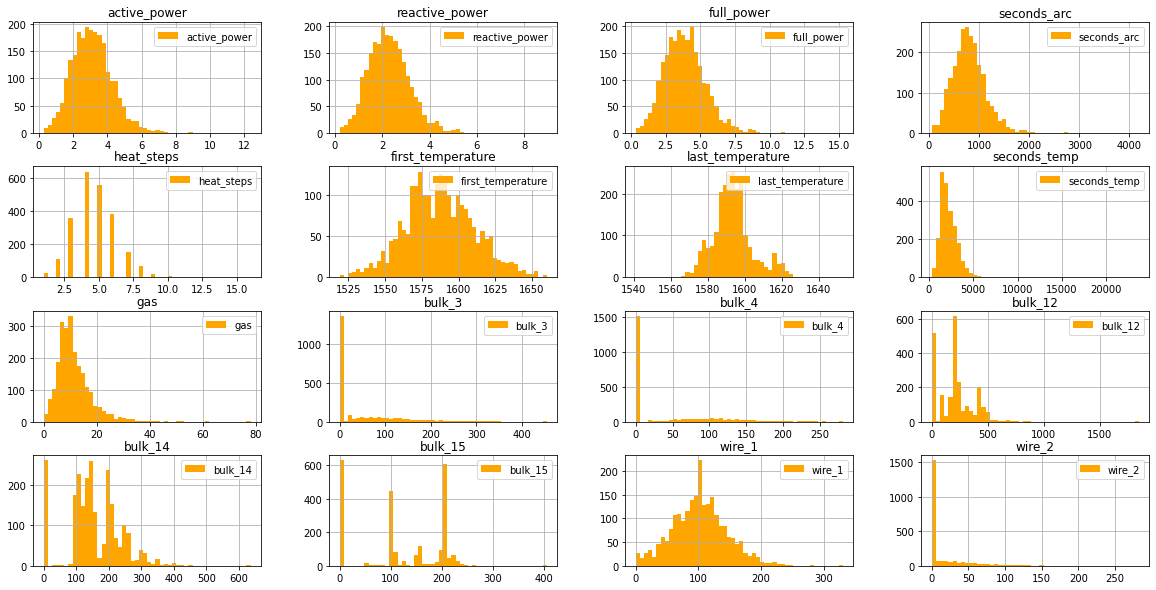

In [49]:
display(merged_df.hist(bins=50, figsize=(20,10), legend = True, color='orange'))

Все графики в объедененном датафрейме имеют нормальное распределение, со смщением купола влево и небольшим хвостом справа. Все это не касается столбцов столбцов с изначально большим кол-вом пропусков, такие как: bulk_n - столбцы и wire_2. Но в свою очередь wire_1 имевший наименьшее кол-во пропусков имеет такое же нормальное распределение.

### Корреляция

Заказчик попросил вывести график корреляции между признаками. Для этого сначала разделим признаки и целевого значение. Сделаем расцветку светофором: зеленое - это хорошо, красное - плохо, желтое - что-то между.

In [50]:
features=merged_df.drop(['last_temperature'],axis=1)
target=merged_df['last_temperature']

Удалим активную и реактивную мощность, они не имеют смысла - у нас есть полная мощность

In [51]:
features=features.drop(['active_power'],axis=1)
features=features.drop(['reactive_power'],axis=1)

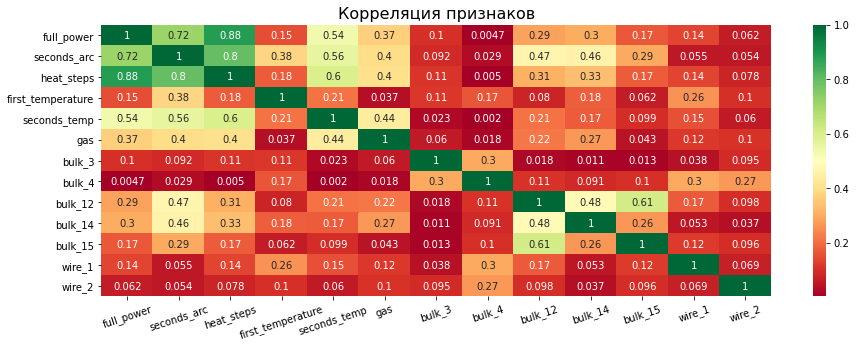

In [52]:
plt.figure(figsize=(15,5))
fig = sns.heatmap(features.corr().abs(), cmap='RdYlGn', annot=True)
plt.title('Корреляция признаков', fontsize=16)
plt.setp(fig.get_xticklabels(), rotation=18)
plt.show()

### Вывод по предобработке и анализу данных
* Обработаны пропуски и аномалии
* Данные приведены в корректный вид (названия столбцов, тип данных)
* Добавлено 4 новых признака, которые имеют высокую корреляцию

## Обучение модели

### Разделение на тренировочную и тестовую выборки

Делим на тренировочную и тестовую выборки. Заказчик потребовал, чтобы размер обучающей выборки был больше 1700.

In [53]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=RND_ST, shuffle=True
)
display(features_train.shape)
display(features_test.shape)

(1743, 13)

(581, 13)

1743 строк. Требование заказчика удовлетворили.

### Выбор лучшей модели

Сделаем функцию иллюстрации предсказанных значений

In [54]:
def illustration(test,predict):
    plt.figure(figsize=(10, 5))
    pd.Series(predict).hist(bins=50, alpha=0.8)
    pd.Series(test).hist(bins=50, alpha=0.8)
    plt.legend(['Предсказанные значения', 'Истинные значения'])
    plt.title('График распределения предсказанных и истинных значениий', y=1.05)
    plt.xlabel('Предсказанные / Истинные значения')
    plt.ylabel('Количество')
    plt.subplot()
    
    plt.figure(figsize=(10, 10))
    plt.plot(predict,test,'o', alpha=0.5)
    plt.xlim(1500,1700)
    plt.ylim(1500,1700)
    plt.plot([-3000,1700],[-3000,1700],'--y', linewidth=2)
    plt.title('График отношения предсказанных значений к истинным значениям', y=1.05)
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Истинные значения')
    plt.show()

Подберем лучшие гиперпараметры для случайного леса

MAE (train): 2.60
Лучшие параметры:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 300}
Score:  -6.081895417782009


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


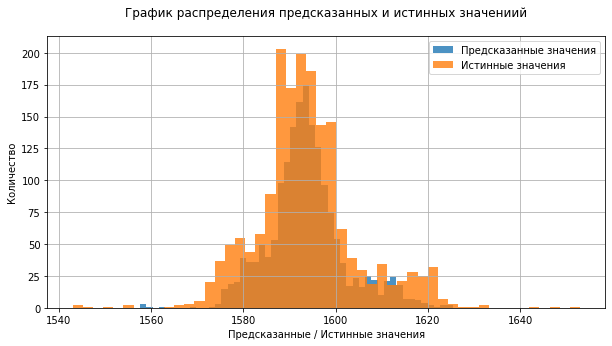

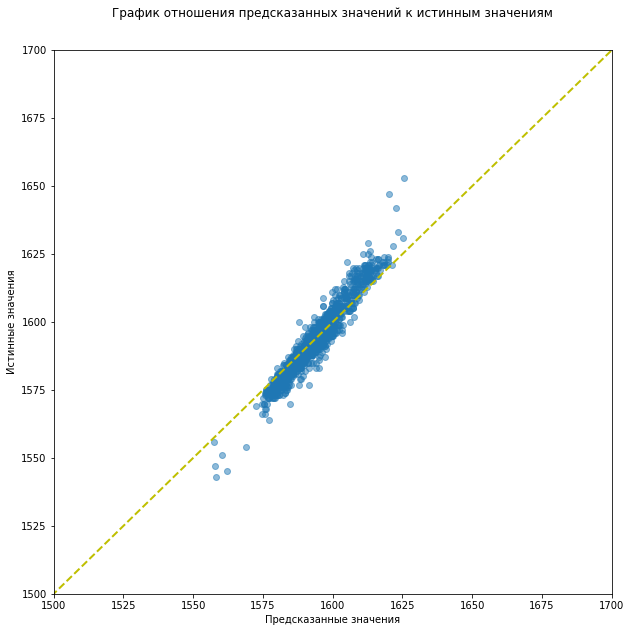

In [55]:
param_grid = {
   'n_estimators': [100, 200, 300],
   'max_depth': [None, 10, 20, 30],
   'min_samples_leaf': [1, 2, 4],
   'bootstrap': [True, False]
}
rfr = RandomForestRegressor(random_state=RND_ST)
rfr_grid = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='neg_mean_absolute_error')
rfr_grid.fit(features_train, target_train)
train_predictions = rfr_grid.predict(features_train)
result = mean_absolute_error(target_train, train_predictions)
print(f'MAE (train): {result:.2f}')
print("Лучшие параметры: ",rfr_grid.best_params_)
print("Score: ", rfr_grid.best_score_)
illustration(target_train, train_predictions)

CatBoostRegressor

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1, loss_function=MAE
0:	learn: 7.7413907	total: 50.7ms	remaining: 50.7s
1:	learn: 7.5887006	total: 53.6ms	remaining: 26.7s
2:	learn: 7.4638046	total: 56.4ms	remaining: 18.7s
3:	learn: 7.3026254	total: 59.1ms	remaining: 14.7s
4:	learn: 7.1941802	total: 61.6ms	remaining: 12.3s
5:	learn: 7.0417181	total: 64.2ms	remaining: 10.6s
6:	learn: 6.9633868	total: 66.8ms	remaining: 9.47s
7:	learn: 6.8492201	total: 69.2ms	remaining: 8.58s
8:	learn: 6.7547422	total: 71.7ms	remaining: 7.9s
9:	learn: 6.6753151	total: 74.4ms	remaining: 7.37s
10:	learn: 6.6057121	total: 77.3ms	remaining: 6.95s
11:	learn: 6.5404579	total: 79.8ms	remaining: 6.57s
12:	learn: 6.4984212	total: 82.5ms	remaining: 6.26s
13:	learn: 6.4293506	total: 85.3ms	remaining: 6s
14:	learn: 6.3576868	total: 87.9ms	remaining: 5.77s
15:	learn: 6.2855854	total: 90.6ms	remaining: 5.57s
16:	learn: 6.2459992	tot

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


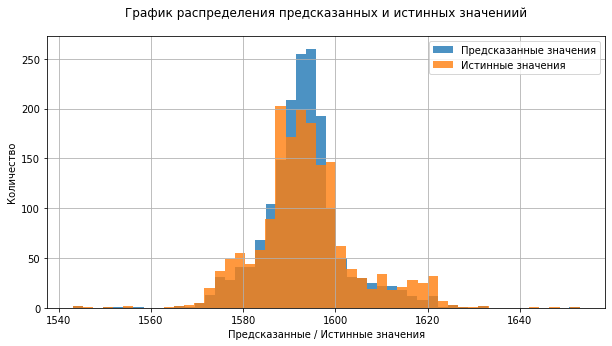

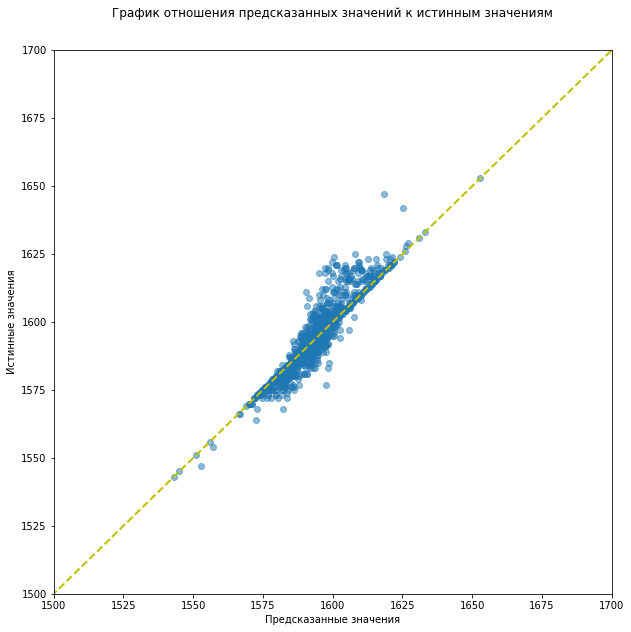

In [56]:
param_grid = {
    'loss_function':['MAE'],
   'learning_rate': [0.1],
   'depth': [6,8,10],
    'l2_leaf_reg': [1, 3, 5],
   'iterations': [1000]
}
model = CatBoostRegressor(random_state=RND_ST)
cat_grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', verbose=10)
cat_grid.fit(features_train, target_train)
train_predictions = cat_grid.predict(features_train)
result = mean_absolute_error(target_train, train_predictions)
print(f'MAE (train): {result:.2f}')
print("Лучшие параметры: ",cat_grid.best_params_)
print("Score: ", cat_grid.best_score_)
illustration(target_train, train_predictions)

GaussianProcessRegressor

MAE (train): 6.66
Лучшие параметры:  {'learning_rate': 0.01, 'n_estimators': 200}
Score:  -6.944926870839998


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


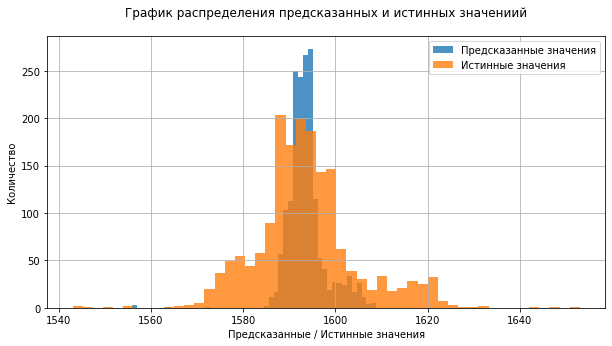

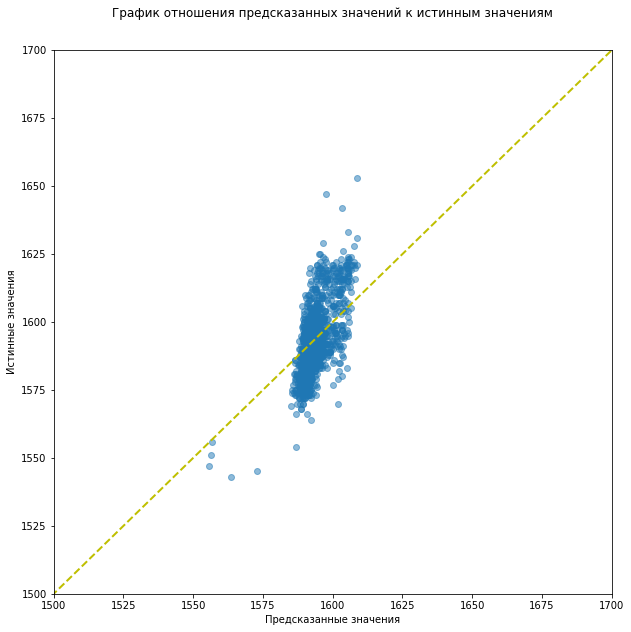

In [57]:
param_grid = {
   'n_estimators': [10, 50, 100, 200],
   'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

abc = AdaBoostRegressor(random_state=RND_ST)
abc_grid = GridSearchCV(abc, param_grid, scoring='neg_mean_absolute_error', cv=5)
abc_grid.fit(features_train, target_train)
train_predictions = abc_grid.predict(features_train)
result = mean_absolute_error(target_train, train_predictions)
print(f'MAE (train): {result:.2f}')
print("Лучшие параметры: ",abc_grid.best_params_)
print("Score: ", abc_grid.best_score_)
illustration(target_train, train_predictions)

Обучим модель DummyRegressor и посмотрим на значение MAE на тестовых данных

MAE: 8.46815834767642


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


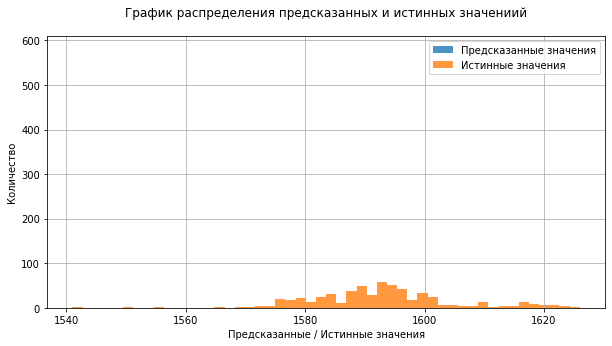

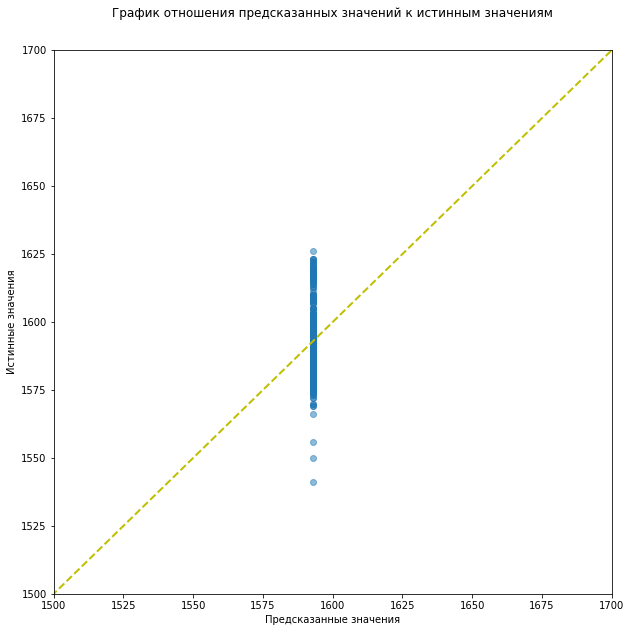

In [58]:
dummy_regressor = DummyRegressor(strategy = "median")
dummy_regressor.fit(features_train, target_train)
pred_dum = dummy_regressor.predict(features_test)
mae_dum = mean_absolute_error(target_test, pred_dum)
print(f"MAE: {mae_dum}")
illustration(target_test, pred_dum)

По итогу лучше всех оказался CatBoostRegressor с MAE = на кросс-валидации

### Тестирование лучшей модели и важность признаков

Протестируем CatBoostRegressor на тестовых данных со следующими параметрами подобранными на кросс-валидации: depth=6, iterations=1000, learning_rate=0.1, verbose=100, l2_leaf_reg = 5 loss_function='MAE', random_state = RND_ST.

0:	learn: 7.7386680	total: 3.22ms	remaining: 3.22s
100:	learn: 4.5442536	total: 287ms	remaining: 2.55s
200:	learn: 3.6396041	total: 586ms	remaining: 2.33s
300:	learn: 3.2128629	total: 870ms	remaining: 2.02s
400:	learn: 2.9136474	total: 1.15s	remaining: 1.71s
500:	learn: 2.7249984	total: 1.43s	remaining: 1.42s
600:	learn: 2.5798875	total: 1.73s	remaining: 1.15s
700:	learn: 2.4560613	total: 2.01s	remaining: 859ms
800:	learn: 2.3660045	total: 2.3s	remaining: 572ms
900:	learn: 2.2860513	total: 2.61s	remaining: 287ms
999:	learn: 2.2067722	total: 2.9s	remaining: 0us
MAE: 6.322315008694755
R2: 0.4362508988439635


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


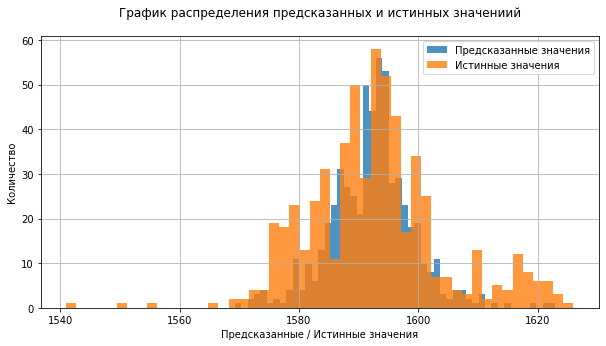

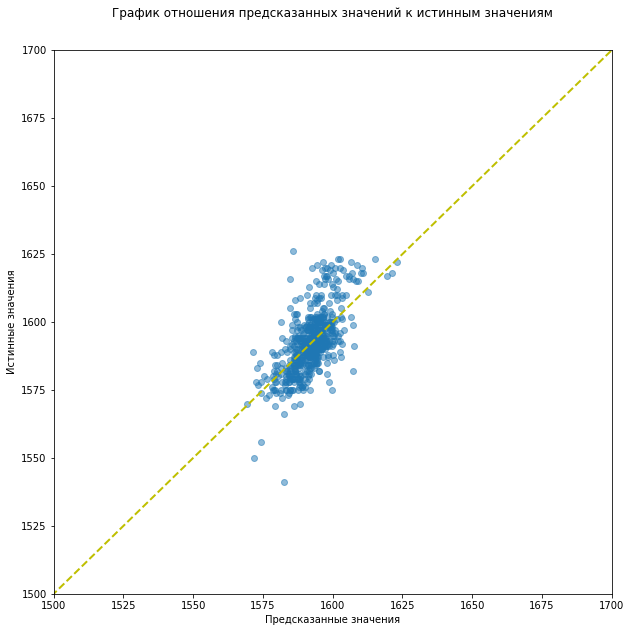

In [59]:
cbr = CatBoostRegressor(depth=6, iterations=1000, l2_leaf_reg = 5, learning_rate=0.1, verbose=100, loss_function='MAE', random_state = RND_ST)
cbr.fit(features_train, target_train)
pred_cbr = cbr.predict(features_test)
mae_cbr = mean_absolute_error(target_test, pred_cbr)
r2_cbr = r2_score(target_test, pred_cbr)
print(f"MAE: {mae_cbr}")
print(f"R2: {r2_cbr}")
illustration(target_test, pred_cbr)

Для сравнения запустим CatBoostRegressor с дефолтными значениями

Learning rate set to 0.0447
0:	learn: 10.9947147	total: 3.11ms	remaining: 3.11s
100:	learn: 7.3678323	total: 268ms	remaining: 2.38s
200:	learn: 6.3954323	total: 564ms	remaining: 2.24s
300:	learn: 5.6483606	total: 828ms	remaining: 1.92s
400:	learn: 5.1063138	total: 1.09s	remaining: 1.64s
500:	learn: 4.7071554	total: 1.36s	remaining: 1.36s
600:	learn: 4.3143755	total: 1.63s	remaining: 1.08s
700:	learn: 3.9779439	total: 1.9s	remaining: 810ms
800:	learn: 3.6998761	total: 2.17s	remaining: 539ms
900:	learn: 3.4202067	total: 2.44s	remaining: 269ms
999:	learn: 3.1899481	total: 2.71s	remaining: 0us
MAE: 6.158197466514063
R2: 0.4802372676882233


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


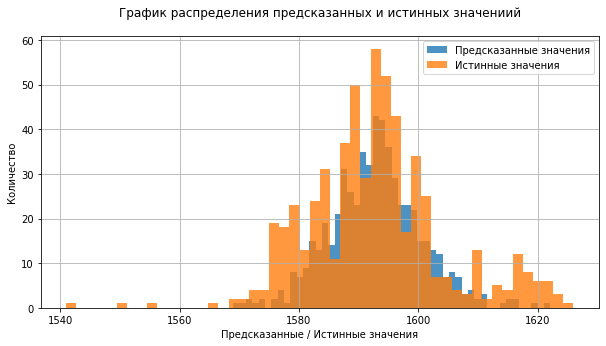

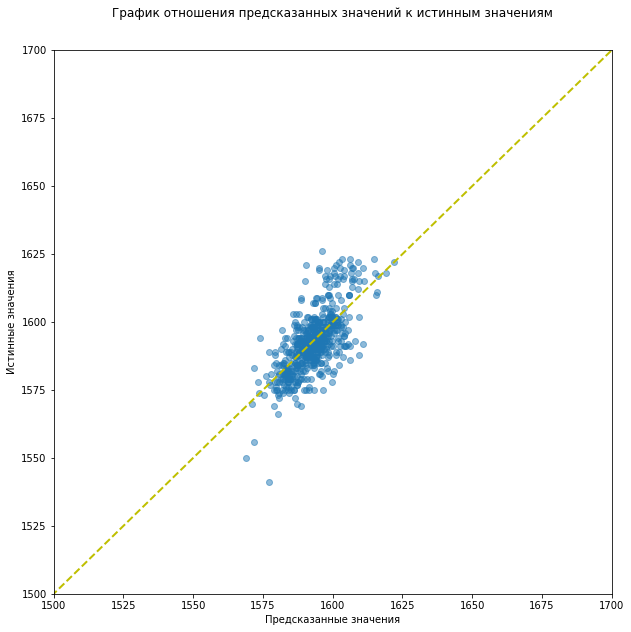

In [60]:
cbr = CatBoostRegressor(random_state = RND_ST, verbose=100)
cbr.fit(features_train, target_train)
pred_cbr = cbr.predict(features_test)
mae_cbr = mean_absolute_error(target_test, pred_cbr)
r2_cbr = r2_score(target_test, pred_cbr)
print(f"MAE: {mae_cbr}")
print(f"R2: {r2_cbr}")
illustration(target_test, pred_cbr)

Как мы можем видеть - дефолтная модель CatBoostRegression выиграла у той, что мы пытались настроить на значение лучше

Строим графики важности признаков

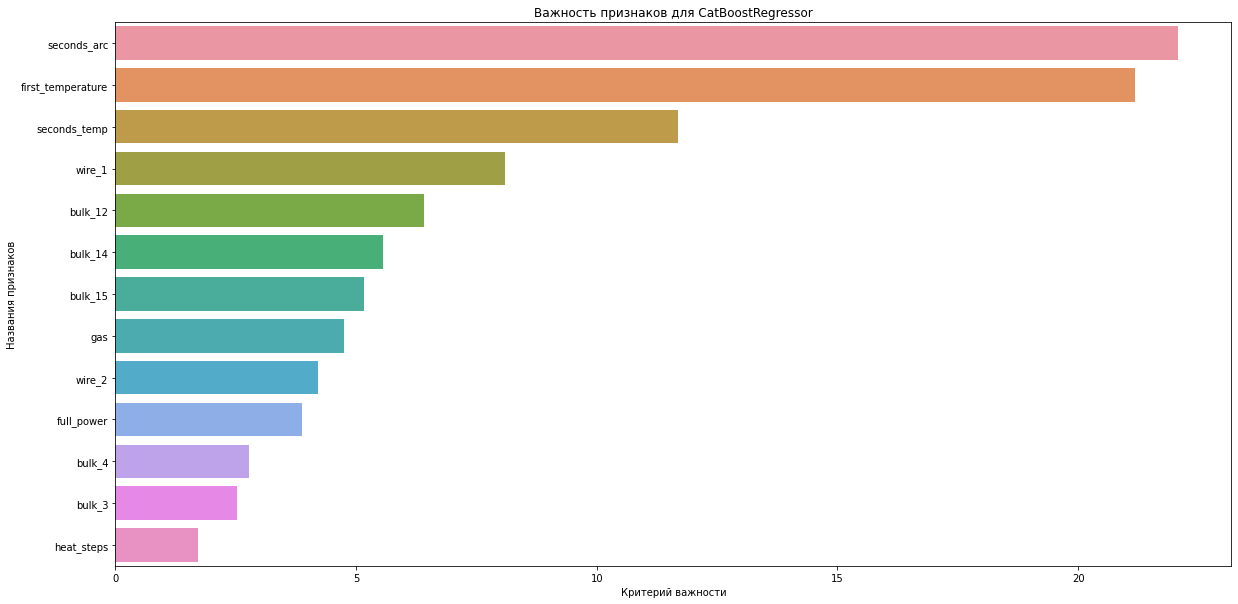

In [61]:
plot_data = {
    'features': features_test.columns,
    'feature_importance': cbr.feature_importances_,
}
plot_data = pd.DataFrame(plot_data)
plot_data.sort_values(by='feature_importance', ascending=False, inplace=True)
plt.figure(figsize=(20, 10))
sns.barplot(x=plot_data['feature_importance'], y=plot_data['features'])
plt.title('Важность признаков для CatBoostRegressor')
plt.xlabel('Критерий важности')
plt.ylabel('Названия признаков')
plt.show()

Тут я применил график SHAP, чтобы понять как признаки различных величин влияют на итоговое предсказание

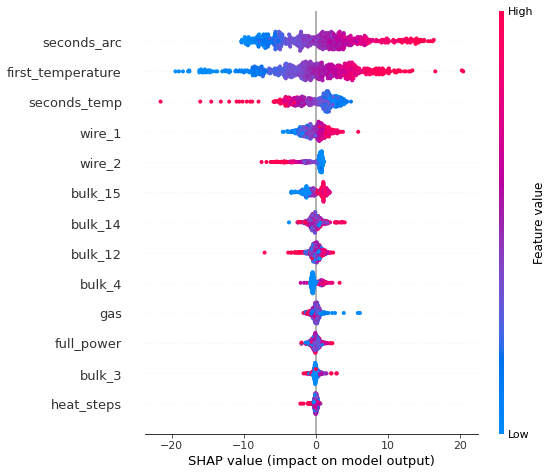

None

In [62]:
shap.initjs()
explainer = shap.TreeExplainer(cbr)
shap_values = explainer.shap_values(features_test)
display(shap.force_plot(explainer.expected_value, shap_values[0,:], features_test.iloc[0,:]))
display(shap.summary_plot(shap_values, features_test))

### Вывод по тестированию и важности признаков 
CatBoostRegression показал результат: 
* с дефолтными настройками MAE = 6.16, и R2_score = 0.48
* с нашими настройками MAE = 6.32, и R2_score = 0.44
<br /> 

Как мы можем выглядить из двух графиков выше - first_temperature, seconds_arc и wire_1 имеют наибольшую значимость для модели CatBoostRegression:
* Чем выше значение начальной температуры (first_temperature), тем лучше для предсказаний модели 
* Такая же ситуация с общим временем нагрева дуги (seconds_arc) и объемом подаваемых проволочных материалов

----------------------------------------------------------------------------------------------------------------------------------------------------

## Общий вывод
* Обработаны пропуски и аномалии
* Данные приведены в корректный вид (названия столбцов, тип данных)
* Добавлено 4 новых признака, которые имеют высокую корреляцию
* Финальная модель и значения метрик на тестовой выборке: CatBoostRegression с дефолтными параметрами с random_state = 271123: MAE = 6.16, и R2_score = 0.48.
* Чем выше значение начальной температуры (first_temperature), тем лучше для предсказаний модели
* Такая же ситуация с общим временем нагрева дуги (seconds_arc) и объемом подаваемых проволочных материалов <br /> 
<br /> 
Из всего вышеперечисленного можно сделать предположение, что изначальная высокая температура может снизить затраты на нагрев сплава до нужной температуры, а также повысить способность модели предсказывать температуру. Это строится из предположения, что материал, который подается в сплав - остужает его. А так как материалы в любом случае будут подаваться в сплав для корректировки химического состава, то изначальная высокая температура может скомпенсировать потери тепла при подачи материала, чтобы дополнительно не нагревать сплав. Так же, чем меньше времени прошло между последним и первым замером температуры - тем более точно модель сможет определить температуру сплава. Из этого уже можно сделать вывод, что более частые взятия проб и температур помогут быстрее достичь нужного результата - а значит снизить потребление электричества. Но возможно этого всего и не требуется потому что моя модель предсказывает температуру с ошибкой всего около 6 градусов, а при таких температурах (1500 и выше градусах) 6 градусов выглядят не очень существенно. Тем не менее мы достигли нужного заказчику значения MAE.
